Saving IMG_4978.jpeg to IMG_4978.jpeg


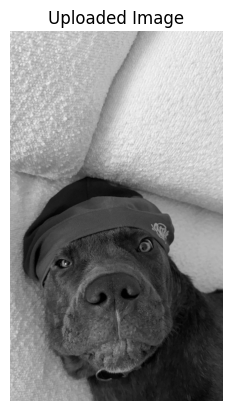

In [1]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload an image file
uploaded = files.upload()

# Get the filename from the uploaded dictionary
filename = list(uploaded.keys())[0]

# Read the image in grayscale
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Display the uploaded image
plt.imshow(img, cmap='gray')
plt.title("Uploaded Image")
plt.axis('off')
plt.show()


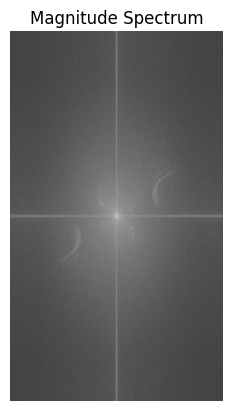

In [2]:
# Compute FFT
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)  # Shift the zero frequency component to the center
magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)  # Log scaling for visualization

# Display the Magnitude Spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')
plt.show()


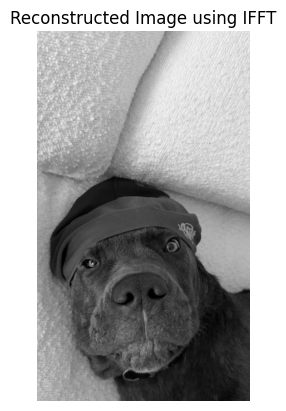

In [3]:
# Compute Inverse FFT
dft_ishift = np.fft.ifftshift(dft_shift)  # Shift back
img_reconstructed = np.fft.ifft2(dft_ishift).real  # Compute IFFT and take real part

# Display Reconstructed Image
plt.imshow(img_reconstructed, cmap='gray')
plt.title("Reconstructed Image using IFFT")
plt.axis('off')
plt.show()


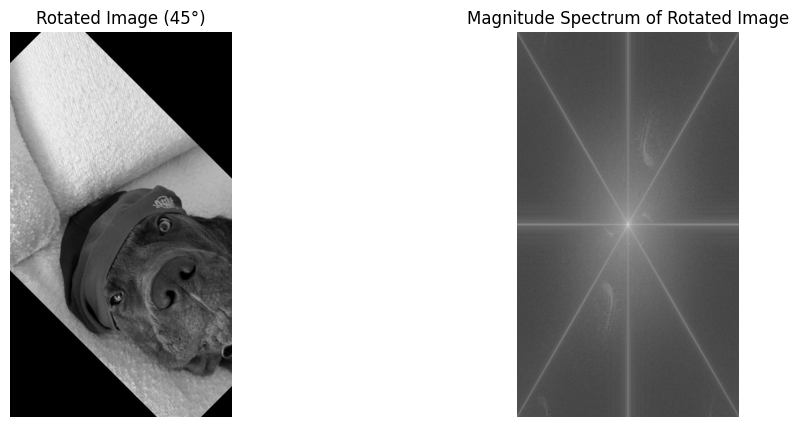

In [4]:
# Rotate image by 45 degrees
(h, w) = img.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)  # Rotation matrix
rotated_img = cv2.warpAffine(img, M, (w, h))

# Compute FFT of rotated image
dft_rot = np.fft.fft2(rotated_img)
dft_shift_rot = np.fft.fftshift(dft_rot)
magnitude_spectrum_rot = 20 * np.log(np.abs(dft_shift_rot) + 1)

# Display Rotated Image
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(rotated_img, cmap='gray')
plt.title("Rotated Image (45°)")
plt.axis('off')

# Display Magnitude Spectrum of Rotated Image
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_rot, cmap='gray')
plt.title("Magnitude Spectrum of Rotated Image")
plt.axis('off')

plt.show()
